# TP5 - Exercise - Violent Crime Rates by US State
## Mateus Ribeiro da Silva 

In [1]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Import dataset
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv", index_col=0)

In [3]:
#Show dataset
violent_crime.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
#Verify if there is missing values
violent_crime.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Dataset does not have missing values.

### Pre Processing 

In order to clustering dataset, it's necessary to standardize the data, once Hierarquical Clustering computes distances beetween points for similarity.  

In [5]:
#Normalized dataset
df_scaled = normalize(violent_crime)
violent_crime_norm = pd.DataFrame(df_scaled, columns = violent_crime.columns)
violent_crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


### Clustering Model -  Hierarchical Clustering

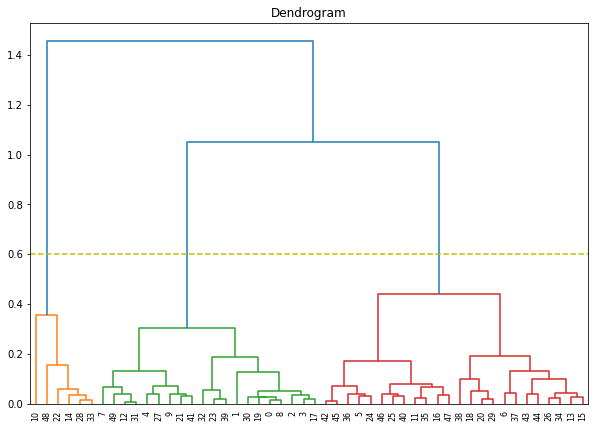

In [6]:
#First of all, we will draw a dendrogram to verify how many clusters we need to choose. The method used in linkage will be 'ward' due to the fact that this method have good beheaviour against noises

plt.figure(figsize=(10,7))
plt.title('Dendrogram')

link = linkage(violent_crime_norm, method='ward', metric='euclidean')
plt.axhline(y=0.6, color='y', linestyle='--')
dendrogram(link)
plt.show()

As we can see, the dendrogram give us 3 clusters when we cut the tree in 0.6 distance value. So, we choose 3 clusters to our problem.

In [7]:
#Cutting the tree and labeling the dataset
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(violent_crime_norm)

#Labels into dataset
violent_crime['Cluster'] = cluster.labels_

#Show dataset with new column Cluster
violent_crime.head()

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,2


In [8]:
#Count the amount of states for each cluster
violent_crime.groupby('Cluster').count()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,24,24,24,24
1,6,6,6,6
2,20,20,20,20


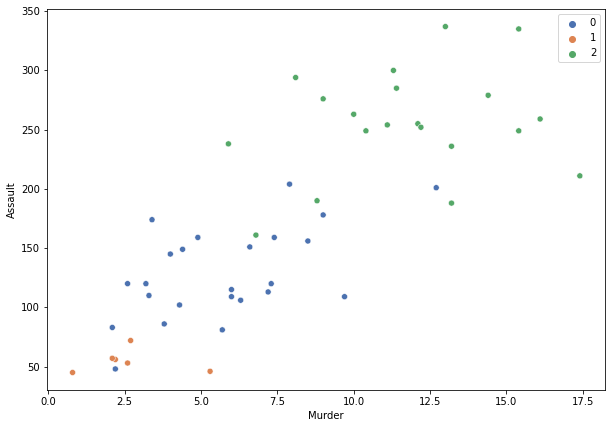

In [9]:
#Visualizing some informations from dataset

#Relation beetween murder and assalt for each cluster
plt.figure(figsize=(10,7))
sns.scatterplot(x=violent_crime['Murder'], y=violent_crime['Assault'], hue=cluster.labels_, palette='deep')

Cluster 2, as we can see, show us that states within this cluster tends to have a great amount of murder and assaults. On the other hand, Cluster 1 show a much smaller of these crimes.

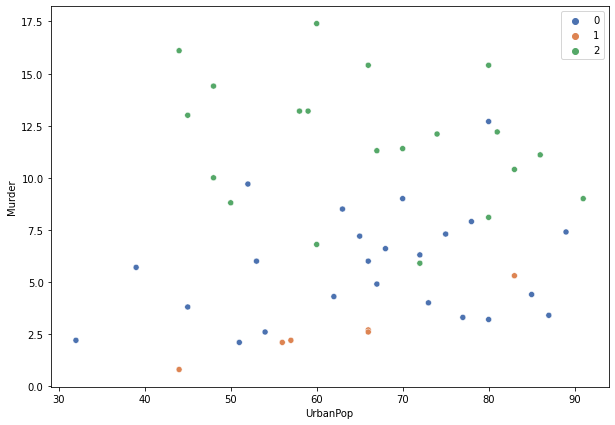

In [10]:
#Visualizing Urban Population and Total Crimes
plt.figure(figsize=(10,7))
sns.scatterplot(x=violent_crime['UrbanPop'], y=violent_crime['Murder'], hue=cluster.labels_, palette='deep')

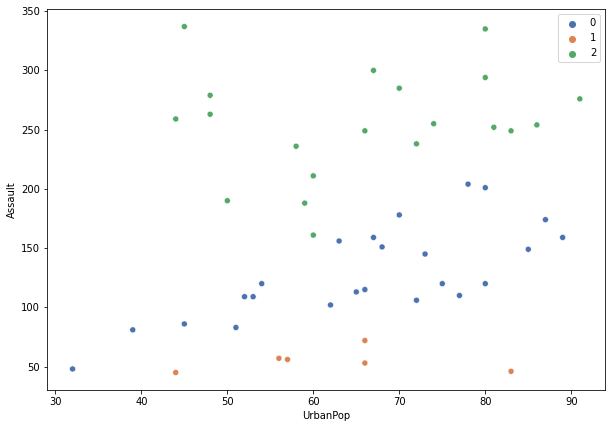

In [11]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=violent_crime['UrbanPop'], y=violent_crime['Assault'], hue=cluster.labels_, palette='deep')

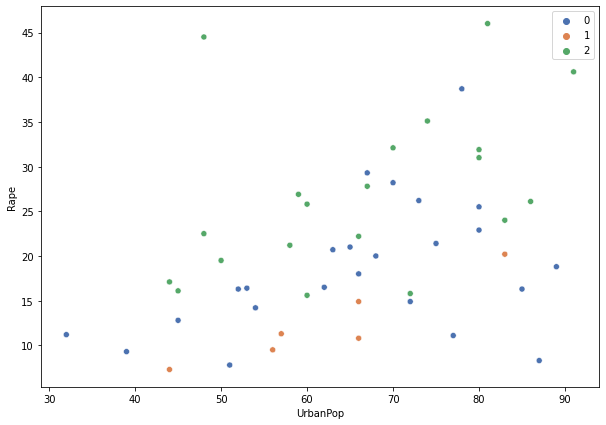

In [12]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=violent_crime['UrbanPop'], y=violent_crime['Rape'], hue=cluster.labels_, palette='deep')

The scatter plots are in agreement with our last analysis, where we can see that Cluster 2 indicates the most violent states, indeed. Whereas the Cluster 1 indicates the safer states, and the Cluster 0 is neither safe nor violent, in most of cases.

In [13]:
#Most safe states
violent_crime[violent_crime['Cluster']==1]

,Murder,Assault,UrbanPop,Rape,Cluster
Hawaii,5.3,46,83,20.2,1
Iowa,2.2,56,57,11.3,1
Minnesota,2.7,72,66,14.9,1
New Hampshire,2.1,57,56,9.5,1
North Dakota,0.8,45,44,7.3,1
Wisconsin,2.6,53,66,10.8,1


In [14]:
#Most violent states
violent_crime[violent_crime['Cluster']==2]

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,2
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,2
Illinois,10.4,249,83,24.0,2
Louisiana,15.4,249,66,22.2,2
